<h1 style="background-color:powderblue;font-family:Brush Script MT; font-size:3.4em;color:black;">  Google Play Store Apps </h1>


<h1 style="font-family:Times New Roman; font-size:1.5em;color:black;">  Problem Defination </h1>
<p style="font-family::WildWest;">The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app</p>


The dataset is from kaggle you can view it and understand columns from this link
https://www.kaggle.com/lava18/google-play-store-apps


## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.=>category
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4 
-Does a higher size or price necessarily mean that an app would perform better than the other apps? Or
-does a higher number of installs give a clear picture of which app would have a better rating than others?
-which content rating has minum rating?
-what  is the max type of content rating?

In [711]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em> Imports the required Libaraies</em> </h2>

In [712]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
sns.set(rc={'figure.figsize' :[9,9]} , font_scale=1.2)
import warnings
warnings.filterwarnings(action='ignore')

## Data Wrangling
<h2 style="font-family:Times New Roman; font-size:2.4m;color:black;"><em> Load Daset</em> </h2>

In [713]:
df=pd.read_csv('data/googleplaystore.csv')

In [714]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [715]:
df.shape
#it consist of 13 columns and 10841

(10841, 13)


<h2 style="font-family:Times New Roman; font-size:4m;color:Purple;"><em> Distinguish the features</em> </h2>

In [716]:
#Print summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [717]:
#Genarate Desrictive Statistics
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<h1 style="font-family:Times New Roman; font-size:2.4em;color:black;"> Data Preprocessing</h1>
<h1 style="font-family:Times New Roman; font-size:1.5em;color:black;"> Feature Engineering & Extraction: </h1>
ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<ul>
    <li><ahref="#DataCleaning">Data Cleaning or Cleansing</a></li>
  <li>Date and Time Features</li>
  <li>String Operations</li>
  <li>Text Features</li>
  <li>Work with missing Data</li>
</ul>
 <h1 style="font-family:Times New Roman; font-size:1.5em;color:black;"> Feature Transformation</h1>
 ul>
<li><a href="#cleaning">Data Cleaning or Cleansing</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Outliers Handling</a></li>
</ul>
 


<h1 style="font-family:Times New Roman; font-size:4m;color:Purple;"><em> Data Cleaning or Cleansing</em> </h1>

<h1 style="font-family:Times New Roman; font-size:6m;color:BLUE;"><em> UniVariate Analysis for Numerical values</em> </h1>

In [718]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


<h2>&#x2022; Fixing  Reviews : to convet it to numerical value</h2>

In [719]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [720]:
for review in df['Reviews'].unique():
    print(review)
#we check that all data is numeric 

159
967
87510
215644
167
178
36815
13791
121
13880
8788
44829
4326
1518
55
3632
27
194216
224399
450
654
7699
61
118
192
20260
203
136
223
1120
227
5035
1015
353
564
8145
36639
158
591
117
176
295221
2206
26
174531
1070
85
845
367
1598
284
17057
129
542
10479
805
1403
3971
534
7774
38846
2431
6090
295
190
40211
356
52530
116986
1379
271920
736
7021
197
737
3574
994
197136
142
15168
2155
138
5414
21777
348
250
13372
7880
3617
4806
65786
31433
5097
1754
2680
1288
18900
49790
1150
1739
32090
2225
4369
8572
964
42050
104
17934
601
36
187
182
30
134
74
113715
3595
9315
75
38
26834
119
2277
2280
184
9
77
35
364
18
473
66
3871
257
62
2914724
1857
4478
577550
814080
246315
454060
155446
418
22486
203130
1435
116507
1433233
90468
860
363934
87873
17506
1862
2084
47303
19080
161
85842
7831
91615
4620
21336
26875
1778
2709
64513
8342
527
1322
1680
2739
1065
233757
2
51269
30105
156
114
341157
16129
674730
1254730
85185
32584
217730
70991
1002861
16589
148945
4458
62272
8941
46353
1279184
88073
67

68071
373606
15426
714340
1451000
1490732
2163282
1163232
114680
751766
2418158
914917
3158151
7594559
1028637
167652
811714
1075277
7529865
3368705
1579343
93726
597068
823109
4865132
197295
21578
307453
32896
98717
542561
462702
521138
283662
82882
459795
133825
911995
1733
342909
31908
56270
107724
101455
152780
21733
410384
277902
91031
112725
76346
63938
18678
39878
152867
63580
121003
135763
176448
1981
16016
9992
36490
122282
4011
25172
14123
2487
180938
950
232423
1664
1391
2486
188834
697
5510
4549
6106
277900
288809
43611
78442
3017
30840
36255
752
926
26102
37167
2020
798
7543
1845
13098
1904
11085
3387
11151
29673
277904
50017
63650
176450
50179
521140
9971
122283
1660
361
5305
24082
133833
91033
990
32386
82883
35394
28895
410395
11549
34123
459797
4057
5517
4272
342912
666521
838765
2943
108318
18679
68935
80900
5511
75545
1605267
136626
219848
52029
49190
5150
64713
216388
481545
6012
260121
1830388
17878
26871
1162837
359403
9235155
33782
192641
2338655
751551
24781
328

254518
647721
88901
65146
104551
66321
29270
751911
1520
11087
26426
2728
132
463
386
5300
25726
226
1491
592
181
690
677
79826
3647
242096
3452530
16973
1424
169661
172
7441
43252
36151
113
8343
209
27135
6230
137377
7461
39109
5988
10341
193
289
540
4496
1238
474
4071
3347
983
1988
3491
4396
192851
8418
9443
3156484
787
838
2806
66033
54090
3103
48545
3451011
618562
4330
484226
28390
1580
556929
1535581
2520
559597
305367
128367
103909
76608
275843
123309
263907
1849
3066
262
28892
634159
428
1542
17067
3322
2509
447
29798
412
407
1073
63056
643
81219
694
35188
31883
101762
28660
20101
10440
267378
2017
142693
2076
7118
21187
34079
4334
1644
1630
10758
2390099
9612
5442
205830
3049
867
14453
6079
129268
167406
128579
389
8175
8114
4027
17180
286
675
219
577
35479
7420
5055
3640
1819
2312084
282
284795
5644
63765
313769
305737
1118201
899010
1259723
181961
205914
341234
1042170
42729
29944
212067
155694
285838
344383
129305
104676
4099
4722
501
616
4010
325
35121
341
381023
26601
414


In [721]:
'''
def fix_reviews(r):
    try:
        return float(r)
    except:
        return np.nan
df['Reviews']=df['Reviews'].apply(fix_reviews)
'''
        
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [722]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [723]:
df['Reviews'].dtypes
#the column reviews is sucessufuly converted to numirecal value

dtype('float64')

<h2>&#x2022; Fixing  Size : to convet it to numerical value</h2>

In [724]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [725]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [726]:
for s in df['Size'].unique():
    print(s)

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [727]:
#First convert size to numerical value and make value in Mega
'''
def fix_size(s):
    try:
        if s[-1]=='M':
            return float(s[:-1]) 
        elif s[-1]=='k':
             return float(s[:-1])/1024
        elif s=='1,000+':
            return 1.0
        else:
            np.nan
    except:
        return np.nan
'''
def fix_size(s):
    try:
        if s.endswith('M'):
            return float(s[:-1]) 
        elif s.endswith('k'):
             return float(s[:-1])/1024
        elif s=='1,000+':
            return 1.0
        else:
            np.nan
    except:
        return np.nan

In [728]:
#convert size values in Mega
df['Size']=df['Size'].apply(fix_size)

In [729]:
'''s='5M'
s.endswith('M')'''

"s='5M'\ns.endswith('M')"

In [730]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [731]:
df['Size'].dtype

dtype('float64')

In [732]:
fix_size('1000M')

1000.0

<h2>&#x2022; Fixing  Price : to convet it to numerical value</h2>

In [733]:
#checking the price column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [734]:
for p in df['Price'].unique():
    print(p)

0
$4.99
$3.99
$6.99
$1.49
$2.99
$7.99
$5.99
$3.49
$1.99
$9.99
$7.49
$0.99
$9.00
$5.49
$10.00
$24.99
$11.99
$79.99
$16.99
$14.99
$1.00
$29.99
$12.99
$2.49
$10.99
$1.50
$19.99
$15.99
$33.99
$74.99
$39.99
$3.95
$4.49
$1.70
$8.99
$2.00
$3.88
$25.99
$399.99
$17.99
$400.00
$3.02
$1.76
$4.84
$4.77
$1.61
$2.50
$1.59
$6.49
$1.29
$5.00
$13.99
$299.99
$379.99
$37.99
$18.99
$389.99
$19.90
$8.49
$1.75
$14.00
$4.85
$46.99
$109.99
$154.99
$3.08
$2.59
$4.80
$1.96
$19.40
$3.90
$4.59
$15.46
$3.04
$4.29
$2.60
$3.28
$4.60
$28.99
$2.95
$2.90
$1.97
$200.00
$89.99
$2.56
$30.99
$3.61
$394.99
$1.26
Everyone
$1.20
$1.04


In [735]:
#covert price to rumerical value by removing $ sign
'''
def fix_price(p):
    try:
        if p[0]=='$':
            return float(p[1:]) 
        elif p=='0'or 'Everyone':
            return 0.0
        else:
            np.nan
    except:
        return np.nan
'''
def fix_price(p):
    try:
        if p.startswith('$'):
            return float(p[1:]) 
        elif p=='0'or 'Everyone':
            return 0.0
        else:
            np.nan
    except:
        return np.nan


In [736]:
df['Price']=df['Price'].apply(fix_price)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [737]:
df['Price'].dtype

dtype('float64')

In [738]:
df.describe()
# it is not logical that rating is 19 because the rating always from 1 to 5

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


In [739]:
df[  df['Rating']>5  ]
#This is app have a lot of problems so it good to drop it 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [740]:
#TO GET ALL INDEXS
idx=df[  df['Rating']>5  ].index

In [741]:
#drop row 
df.drop(idx,axis=0,inplace=True)

In [742]:
df.describe()
#the rating become by default

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


<h1 style="font-family:Times New Roman; font-size:6m;color:BLUE;"><em> UniVariate Analysis for categorical values</em> </h1>

## Category

In [743]:
for c in df['Category'].unique():
    print(c)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [744]:
df['Category']=df['Category'].apply(lambda c: c.title())
for c in df['Category'].unique():
    print(c)

Art_And_Design
Auto_And_Vehicles
Beauty
Books_And_Reference
Business
Comics
Communication
Dating
Education
Entertainment
Events
Finance
Food_And_Drink
Health_And_Fitness
House_And_Home
Libraries_And_Demo
Lifestyle
Game
Family
Medical
Social
Shopping
Photography
Sports
Travel_And_Local
Tools
Personalization
Productivity
Parenting
Weather
Video_Players
News_And_Magazines
Maps_And_Navigation


In [745]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [746]:
for i in df['Installs'].unique():
    print(i)

10,000+
500,000+
5,000,000+
50,000,000+
100,000+
50,000+
1,000,000+
10,000,000+
5,000+
100,000,000+
1,000,000,000+
1,000+
500,000,000+
50+
100+
500+
10+
1+
5+
0+
0


In [747]:
# Get rid of ',' & '+' and change the type to numerical value
df['Installs'] = df.Installs.str.replace('+', '')
df['Installs'] = df.Installs.str.replace(',', '')

In [748]:
#Convert to the nemuric value
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [749]:
df['Installs'].dtype

dtype('int64')

In [750]:
 df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [751]:
 df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [752]:
 df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [753]:
for c in df['Content Rating'].unique():
    print(c)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [754]:
df.drop(['Genres', 'Last Updated', 'Current Ver'],axis=1,inplace=True)

In [755]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,10000,Free,0.0,Everyone,4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000,Free,0.0,Everyone,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,50000000,Free,0.0,Teen,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,100000,Free,0.0,Everyone,4.4 and up
5,Paper flowers instructions,Art_And_Design,4.4,167.0,5.6,50000,Free,0.0,Everyone,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,Art_And_Design,3.8,178.0,19.0,50000,Free,0.0,Everyone,4.0.3 and up
7,Infinite Painter,Art_And_Design,4.1,36815.0,29.0,1000000,Free,0.0,Everyone,4.2 and up
8,Garden Coloring Book,Art_And_Design,4.4,13791.0,33.0,1000000,Free,0.0,Everyone,3.0 and up
9,Kids Paint Free - Drawing Fun,Art_And_Design,4.7,121.0,3.1,10000,Free,0.0,Everyone,4.0.3 and up


In [756]:
for a in df['Android Ver'].unique():
    print(a)

4.0.3 and up
4.2 and up
4.4 and up
2.3 and up
3.0 and up
4.1 and up
4.0 and up
2.3.3 and up
Varies with device
2.2 and up
5.0 and up
6.0 and up
1.6 and up
1.5 and up
2.1 and up
7.0 and up
5.1 and up
4.3 and up
4.0.3 - 7.1.1
2.0 and up
3.2 and up
4.4W and up
7.1 and up
7.0 - 7.1.1
8.0 and up
5.0 - 8.0
3.1 and up
2.0.1 and up
4.1 - 7.1.1
nan
5.0 - 6.0
1.0 and up
2.2 - 7.1.1
5.0 - 7.1.1


## Domain knowledge Features

In [757]:

def check_version_4(version):
    try:
        if version.startswith('4'):
            return 'True'
        else :
            return 'False'
    except :
        return np.nan


In [758]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Android Ver'],
      dtype='object')

In [759]:
# create working on version 4 in Google Play Store App dataset
df['working_on_version_4']=df['Android Ver'].apply(check_version_4)

In [760]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,working_on_version_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,10000,Free,0.0,Everyone,4.0.3 and up,True
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000,Free,0.0,Everyone,4.0.3 and up,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,4.0.3 and up,True
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,50000000,Free,0.0,Teen,4.2 and up,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,100000,Free,0.0,Everyone,4.4 and up,True
5,Paper flowers instructions,Art_And_Design,4.4,167.0,5.6,50000,Free,0.0,Everyone,2.3 and up,False
6,Smoke Effect Photo Maker - Smoke Editor,Art_And_Design,3.8,178.0,19.0,50000,Free,0.0,Everyone,4.0.3 and up,True
7,Infinite Painter,Art_And_Design,4.1,36815.0,29.0,1000000,Free,0.0,Everyone,4.2 and up,True
8,Garden Coloring Book,Art_And_Design,4.4,13791.0,33.0,1000000,Free,0.0,Everyone,3.0 and up,False
9,Kids Paint Free - Drawing Fun,Art_And_Design,4.7,121.0,3.1,10000,Free,0.0,Everyone,4.0.3 and up,True


In [761]:
df.drop('Android Ver', axis=1, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,10000,Free,0.0,Everyone,True
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,500000,Free,0.0,Everyone,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,True
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,50000000,Free,0.0,Teen,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,100000,Free,0.0,Everyone,True
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,5000,Free,0.0,Everyone,True
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100,Free,0.0,Everyone,True
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,1000,Free,0.0,Everyone,False
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,1000,Free,0.0,Mature 17+,False


## Work with Missing Data

In [762]:
#check the number of null values in the columns
df.isna().sum()

App                        0
Category                   0
Rating                  1474
Reviews                    0
Size                    1695
Installs                   0
Type                       1
Price                      0
Content Rating             0
working_on_version_4       2
dtype: int64

In [763]:
df.shape

(10840, 10)

In [764]:
(df.isna().sum()/df.shape[0])*100

App                      0.000000
Category                 0.000000
Rating                  13.597786
Reviews                  0.000000
Size                    15.636531
Installs                 0.000000
Type                     0.009225
Price                    0.000000
Content Rating           0.000000
working_on_version_4     0.018450
dtype: float64

### Handling missing values for rating: Ratings is the target variable

In [765]:
# Percentage of null records in rating to the to the total number of records
print("Precentage of null records in rating column: {:.3f}%".format(df.Rating.isnull().sum()/df.shape[0]*100))

Precentage of null records in rating column: 13.598%


<h3 style="font-family:Times New Roman; font-size:1.5em;color:red;"> Imputing the null values in the target variable might bias the data analysis so we will drop these records</h3>
 

In [766]:
# Drop the records with null in rating
df.dropna(subset='Rating',axis = 0, inplace=True)

In [767]:
df.shape

(9366, 10)

In [768]:
# Check the number of nulls in the dataframe again
df.isna().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                    1637
Installs                   0
Type                       0
Price                      0
Content Rating             0
working_on_version_4       2
dtype: int64

In [769]:
#most frequent
from sklearn.impute import SimpleImputer


In [770]:
imputer = SimpleImputer(strategy='most_frequent')

df['working_on_version_4'] = imputer.fit_transform(df[['working_on_version_4']])
#df['Type'] = imputer.fit_transform(df[['Type']])

In [771]:
df.isna().sum()

App                        0
Category                   0
Rating                     0
Reviews                    0
Size                    1637
Installs                   0
Type                       0
Price                      0
Content Rating             0
working_on_version_4       0
dtype: int64

In [772]:
from sklearn.impute import KNNImputer

In [773]:
imputer=KNNImputer()

In [774]:
#df['Rating'] = imputer.fit_transform(df[['Rating']])
# Check the number of nulls in the dataframe again
df['Size'] = imputer.fit_transform(df[['Size']])

In [775]:
df.isna().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
working_on_version_4    0
dtype: int64

In [776]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,22.957271,1.789744e+07,0.960928
std,0.515219,3.144042e+06,21.298300,9.123822e+07,15.816585
min,1.000000,1.000000e+00,0.008301,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,6.600000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,21.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


<p style="font-family:Times New Roman; font-size:2.4m;color:blue;"><strong>Bussiness Knowledge:
  
 -Rating is between 1 and 5 for all the apps.
    

-Number of Reviews is less than or equal to the number of Installs.   
-Free Apps shouldn’t have a price greater than 0.  
</strong></p>


In [777]:
# Perform checks on the Rating column
df.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [778]:
# Perform  checks on the Reviews column
df[df.Reviews > df.Installs].shape

(7, 10)

In [779]:
# Check these applications
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
2454,KBA-EZ Health Guide,Medical,5.0,4.0,25.000000,1,Free,0.00,Everyone,True
4663,Alarmy (Sleep If U Can) - Pro,Lifestyle,4.8,10249.0,22.957271,10000,Paid,2.49,Everyone,False
5917,Ra Ga Ba,Game,5.0,2.0,20.000000,1,Paid,1.49,Everyone,False
6700,Brick Breaker BR,Game,5.0,7.0,19.000000,5,Free,0.00,Everyone,True
7402,Trovami se ci riesci,Game,5.0,11.0,6.100000,10,Free,0.00,Everyone,False
8591,DN Blog,Social,5.0,20.0,4.200000,10,Free,0.00,Teen,True
10697,Mu.F.O.,Game,5.0,2.0,16.000000,1,Paid,0.99,Everyone,False


In [780]:
# Drop these records
df = df[df.Reviews <= df.Installs]
df.shape

(9359, 10)

In [781]:
# Perform sanity checks on Free apps
df[df.Type == 'Free'].Price.value_counts()

0.0    8715
Name: Price, dtype: int64

## Outliers Handling

In [782]:
from datasist.structdata import  detect_outliers

<AxesSubplot:xlabel='Rating'>

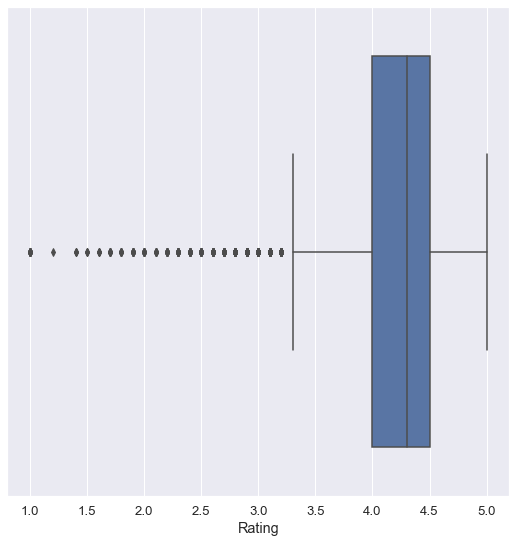

In [783]:
sns.boxplot(x='Rating', data=df)
#most of data are from  4.0 to 4.5

<AxesSubplot:xlabel='Reviews'>

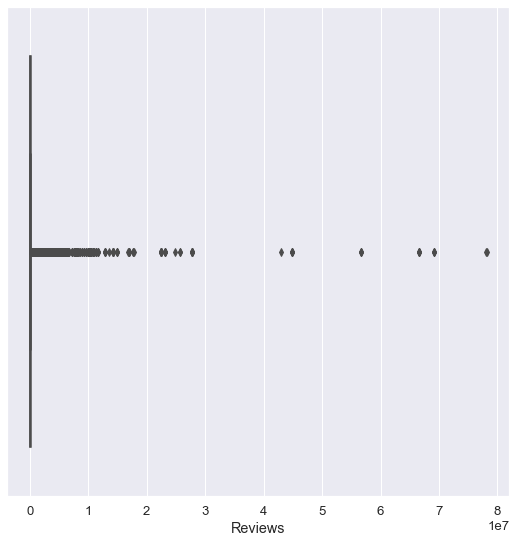

In [784]:
sns.boxplot(x='Reviews', data=df)

<AxesSubplot:xlabel='Price'>

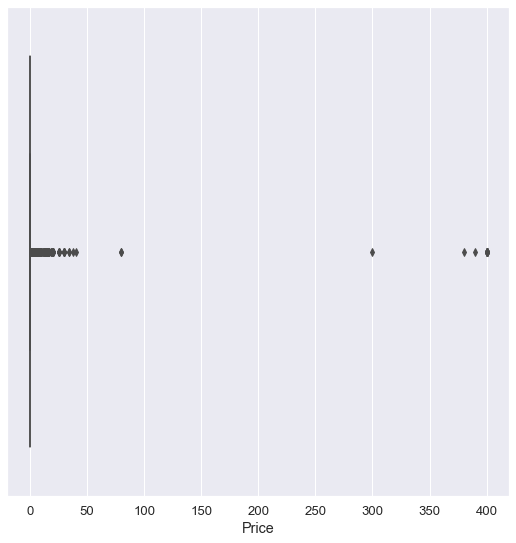

In [785]:
# Create a box plot for Price column
sns.boxplot(x='Price', data=df)
#most of data are from  4.1 to 4.5

In [786]:
# Check the apps with price more than 100
df[df.Price > 100]
#we consider that this apps are fake

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
4197,most expensive app (H),Family,4.3,6.0,1.500000,100,Paid,399.99,Everyone,False
4362,💎 I'm rich,Lifestyle,3.8,718.0,26.000000,10000,Paid,399.99,Everyone,True
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275.0,7.300000,10000,Paid,400.00,Everyone,True
5351,I am rich,Lifestyle,3.8,3547.0,1.800000,100000,Paid,399.99,Everyone,True
5354,I am Rich Plus,Family,4.0,856.0,8.700000,10000,Paid,399.99,Everyone,True
5355,I am rich VIP,Lifestyle,3.8,411.0,2.600000,10000,Paid,299.99,Everyone,True
5356,I Am Rich Premium,Finance,4.1,1867.0,4.700000,50000,Paid,399.99,Everyone,True
5357,I am extremely Rich,Lifestyle,2.9,41.0,2.900000,1000,Paid,379.99,Everyone,True
5358,I am Rich!,Finance,3.8,93.0,22.000000,1000,Paid,399.99,Everyone,True
5359,I am rich(premium),Finance,3.5,472.0,0.942383,5000,Paid,399.99,Everyone,True


In [787]:
df=df[df.Price <= 100]
df.shape

(9344, 10)

<AxesSubplot:xlabel='Price'>

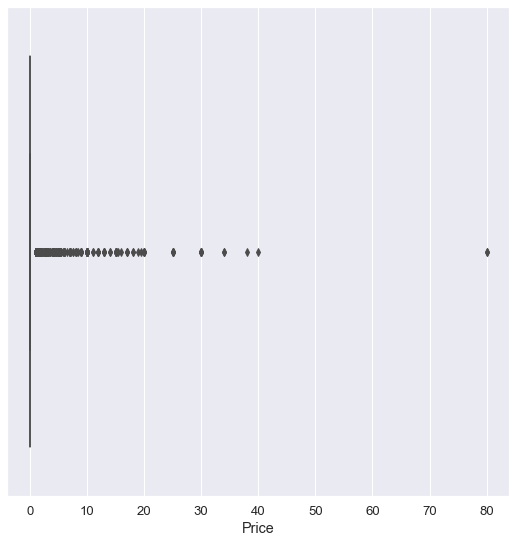

In [788]:
# Now let's plot the price column again
sns.boxplot(x='Price', data=df)

In [789]:
df2=df[df.Price > 0]
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
234,TurboScan: scan documents and receipts in PDF,Business,4.7,11442.0,6.800000,100000,Paid,4.99,Everyone,True
235,Tiny Scanner Pro: PDF Doc Scan,Business,4.8,10295.0,39.000000,100000,Paid,4.99,Everyone,False
290,TurboScan: scan documents and receipts in PDF,Business,4.7,11442.0,6.800000,100000,Paid,4.99,Everyone,True
291,Tiny Scanner Pro: PDF Doc Scan,Business,4.8,10295.0,39.000000,100000,Paid,4.99,Everyone,False
427,Puffin Browser Pro,Communication,4.0,18247.0,22.957271,100000,Paid,3.99,Everyone,True
...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,Game,4.3,85468.0,36.000000,1000000,Paid,0.99,Everyone,True
10690,FO Bixby,Personalization,5.0,5.0,0.840820,100,Paid,0.99,Everyone,False
10760,Fast Tract Diet,Health_And_Fitness,4.4,35.0,2.400000,1000,Paid,7.99,Everyone,True
10782,Trine 2: Complete Story,Game,3.8,252.0,11.000000,10000,Paid,16.99,Teen,False


<AxesSubplot:xlabel='Price'>

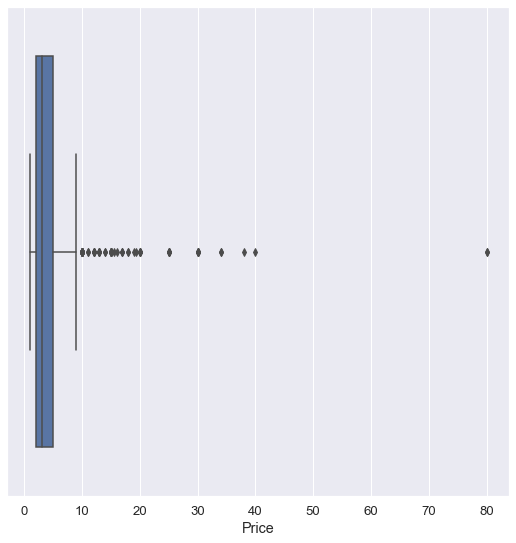

In [790]:
# Let's plot the price column for the paid apps
sns.boxplot(x='Price', data=df2)

In [791]:
# Let's check the apps with price more than 10
df[df.Price > 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,Medical,4.5,2921.0,25.000000,100000,Paid,24.99,Everyone,False
2252,Essential Anatomy 3,Medical,4.1,1533.0,42.000000,50000,Paid,11.99,Mature 17+,True
2253,Vargo Anesthesia Mega App,Medical,4.6,92.0,32.000000,1000,Paid,79.99,Everyone,True
2254,EMT Review Plus,Medical,4.5,199.0,1.800000,10000,Paid,11.99,Everyone,True
2256,2017 EMRA Antibiotic Guide,Medical,4.4,12.0,3.800000,1000,Paid,16.99,Everyone,True
2261,Block Buddy,Medical,4.0,15.0,5.000000,1000,Paid,14.99,Everyone,True
2266,EMT PASS,Medical,3.4,51.0,2.400000,1000,Paid,29.99,Everyone,True
2269,"Cardiac diagnosis (heart rate, arrhythmia)",Medical,4.4,8.0,6.500000,100,Paid,12.99,Everyone,False
2272,AnatomyMapp,Medical,4.1,80.0,48.000000,5000,Paid,14.99,Everyone,False
2277,"Muscle Premium - Human Anatomy, Kinesiology, B...",Medical,4.2,168.0,25.000000,10000,Paid,24.99,Everyone,True


<AxesSubplot:ylabel='Density'>

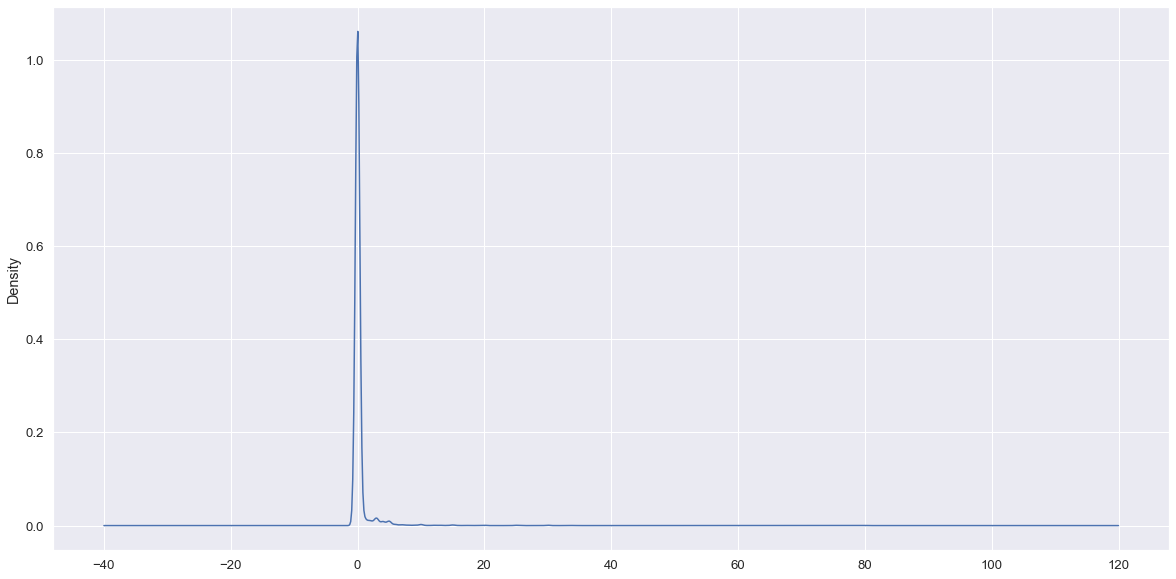

In [668]:
df['Price'].plot(kind = 'kde', figsize = (20, 10))

In [669]:
# Can we drop records price > 10
df[df.Price > 10].describe()

,Rating,Reviews,Size,Installs,Price
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,4.229091,1052.454545,22.822509,17047.818182,21.678909
std,0.471276,2027.782568,22.714309,31946.719109,13.612267
min,2.900000,1.000000,0.259766,10.000000,10.990000
25%,4.000000,16.000000,3.800000,1000.000000,14.495000
50%,4.300000,80.000000,20.000000,1000.000000,16.990000
75%,4.600000,996.000000,31.500000,10000.000000,24.990000
max,5.000000,8450.000000,100.000000,100000.000000,79.990000


In [670]:
#Can we drop records with price > 10
df[df.Price <= 10].describe()

,Rating,Reviews,Size,Installs,Price
count,9289.000000,9.289000e+03,9289.000000,9.289000e+03,9289.000000
mean,4.191474,5.183027e+05,22.985871,1.804568e+07,0.208083
std,0.515267,3.156699e+06,21.302105,9.160104e+07,0.972313
min,1.000000,1.000000e+00,0.008301,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,6.600000,1.000000e+04,0.000000
50%,4.300000,6.148000e+03,21.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,10.000000


In [671]:
from datasist.structdata import detect_outliers
from scipy import stats

In [672]:
outliers_indices = detect_outliers(df, 0, ['Price'])
len(outliers_indices)

629

In [673]:
outliers_indices

[234,
 235,
 290,
 291,
 427,
 476,
 477,
 481,
 571,
 851,
 852,
 853,
 854,
 995,
 1001,
 1227,
 1228,
 1327,
 1335,
 1341,
 1347,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 2062,
 2085,
 2086,
 2087,
 2150,
 2151,
 2152,
 2153,
 2154,
 2168,
 2170,
 2171,
 2172,
 2173,
 2174,
 2175,
 2176,
 2177,
 2178,
 2179,
 2189,
 2190,
 2191,
 2192,
 2202,
 2203,
 2204,
 2205,
 2241,
 2242,
 2243,
 2244,
 2245,
 2246,
 2247,
 2248,
 2249,
 2250,
 2251,
 2252,
 2253,
 2254,
 2255,
 2256,
 2257,
 2258,
 2259,
 2260,
 2261,
 2262,
 2263,
 2264,
 2266,
 2267,
 2268,
 2269,
 2270,
 2271,
 2272,
 2273,
 2274,
 2275,
 2276,
 2277,
 2278,
 2279,
 2281,
 2282,
 2283,
 2284,
 2285,
 2286,
 2287,
 2288,
 2289,
 2290,
 2291,
 2292,
 2293,
 2295,
 2296,
 2297,
 2298,
 2299,
 2300,
 2301,
 2302,
 2365,
 2366,
 2372,
 2378,
 2380,
 2385,
 2386,
 2387,
 2389,
 2395,
 2398,
 2399,
 2400,
 2401,
 2402,
 2406,
 2407,
 2409,
 2414,
 2416,
 2418,
 2420,
 2883,
 2906,
 2912,
 2913,
 2950,
 3039,

In [674]:
#We decided to get rid of these outliers as well
df = df[df.Price <= 10]
df.shape

(9289, 10)

In [675]:
df = df[df.Price <= 10]

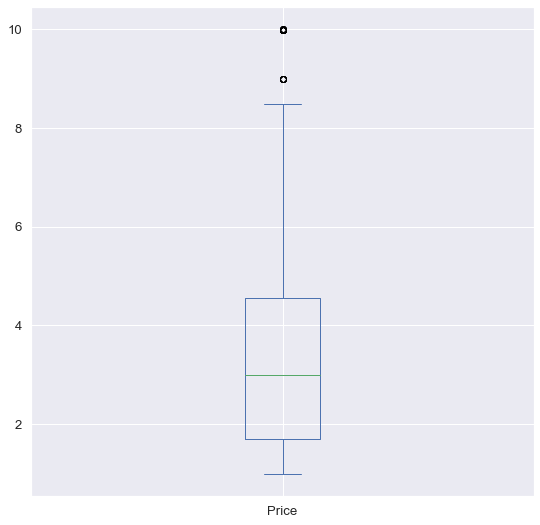

In [676]:
# Let's plot the price column for the paid apps again
df[df.Price > 0].Price.plot.box()
plt.show()

<AxesSubplot:xlabel='Size'>

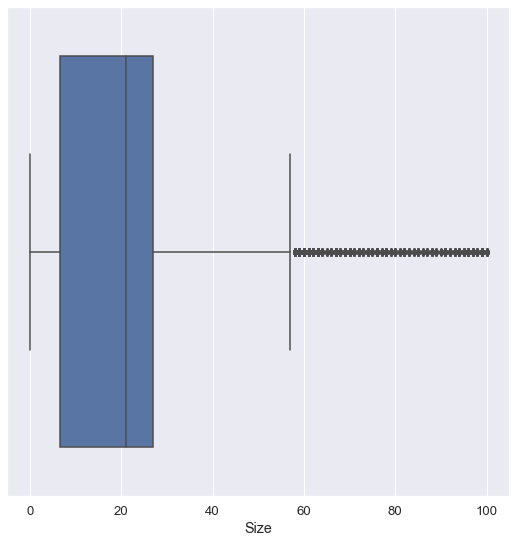

In [677]:
sns.boxplot(x='Size', data=df)
#most of data are from  4.1 to 4.5

In [678]:
##


<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  What is the most expensive app on the store.? </h1>

In [533]:
df[df[ 'Price']==df['Price'].max()]
# I'm Rich - Trump Edition is the Most Expensive app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
2248,Paramedic Protocol Provider,Medical,4.5,171.0,20.0,10000,Paid,10.0,Everyone 10+,True
2380,Paramedic Protocol Provider,Medical,4.5,171.0,20.0,10000,Paid,10.0,Everyone 10+,True
8077,go41cx,Family,4.8,171.0,1.0,1000,Paid,10.0,Everyone,False


<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  Which Genre has more apps.=>category </h1>

In [534]:
df['Category'].value_counts()
#the Genre is #Family has more app

Family                 1731
Game                   1090
Tools                   732
Productivity            351
Communication           328
Medical                 318
Sports                  318
Finance                 316
Photography             316
Personalization         314
Lifestyle               307
Business                301
Health_And_Fitness      297
Social                  258
Shopping                238
News_And_Magazines      233
Travel_And_Local        226
Dating                  195
Books_And_Reference     178
Video_Players           160
Education               155
Entertainment           149
Maps_And_Navigation     123
Food_And_Drink          109
House_And_Home           76
Weather                  75
Auto_And_Vehicles        73
Libraries_And_Demo       65
Art_And_Design           62
Comics                   58
Parenting                50
Events                   45
Beauty                   42
Name: Category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Category'>

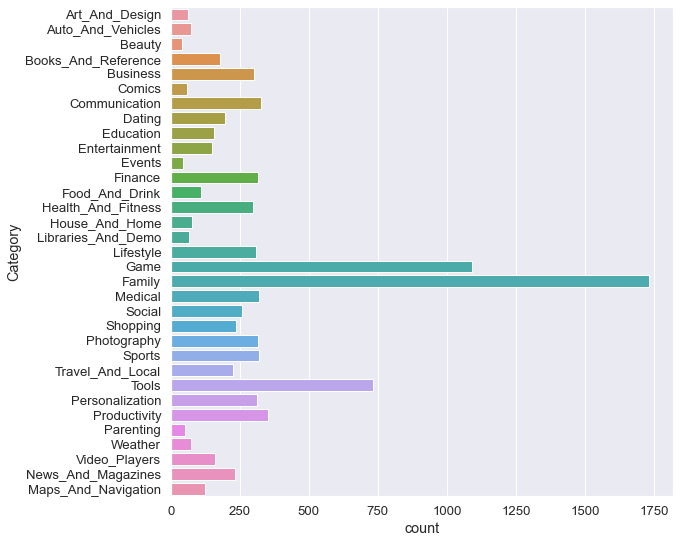

In [535]:
sns.countplot(y='Category',data=df)
#the Genre is #Family has more app

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - What is the average size of the free apps & paid apps? </h1>

In [536]:
#categorical with numeriacal(type and size)
df.groupby('Type').mean()['Size']
#the average size of free app is 21.675505 wile the average size of paid 19.516453

Type
Free    23.116804
Paid    20.997928
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

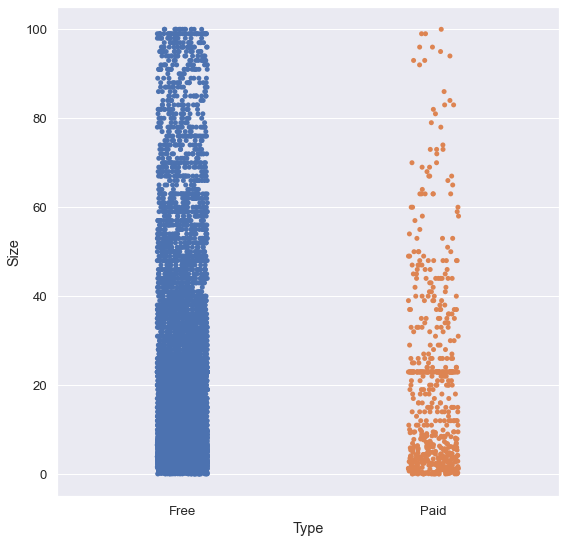

In [537]:
sns.stripplot(x='Type',y='Size',data=df)

<AxesSubplot:xlabel='Type', ylabel='Size'>

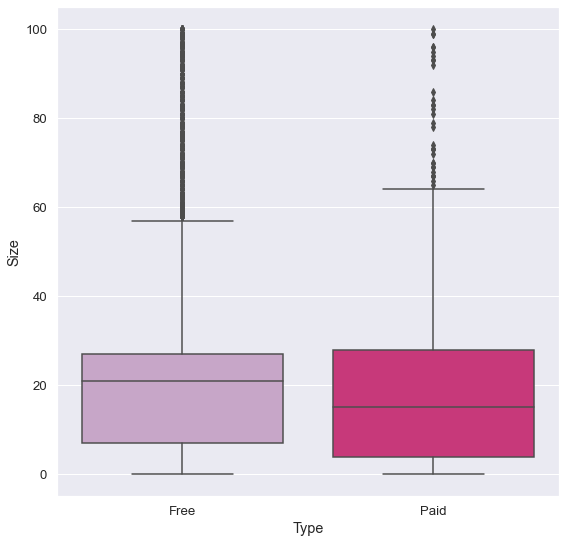

In [538]:
sns.boxplot(x='Type',y='Size',data=df,palette='PuRd')
#the average size of free app is 21.675505 wile the average size of paid 19.516453

<AxesSubplot:xlabel='Type', ylabel='Size'>

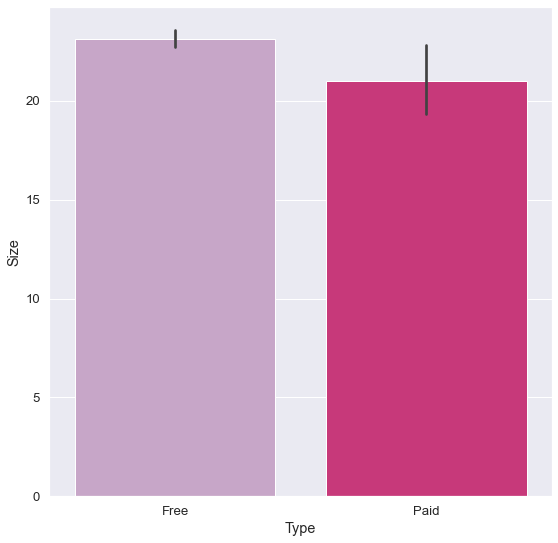

In [539]:
sns.barplot(x='Type',y='Size',estimator=np.mean,data=df,palette='PuRd')

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">
- What is the 5 top expenisve apps that has rate of 5. </h1>

In [540]:
df[df['Rating']==5].sort_values(by='Price',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
5246,Hey AJ! It's Bedtime!,Family,5.0,1.0,63.000000,10,Paid,4.99,Everyone,False
5482,meStudying: AP English Lit,Family,5.0,1.0,0.639648,10,Paid,4.99,Everyone,False
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1.0,27.000000,100,Paid,4.99,Everyone,True
5237,Hey AJ! It's Saturday!,Books_And_Reference,5.0,12.0,50.000000,100,Paid,3.99,Everyone,False
8287,AC DC Power Monitor,Lifestyle,5.0,1.0,1.200000,10,Paid,3.04,Everyone,False


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - How many apps that has more than 50K reviews?</h1>

In [541]:
df[df['Reviews']>50000].sort_values(by='Reviews')
#2782 app has more than 50k review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
3043,DraftKings - Daily Fantasy Sports,Sports,4.5,50017.0,41.000000,1000000,Free,0.0,Adults only 18+,True
9677,Masha and The Bear Jam Day Match 3 games for kids,Family,4.6,50060.0,98.000000,1000000,Free,0.0,Everyone,True
8294,Bokeh (Background defocus),Photography,4.0,50109.0,22.957271,10000000,Free,0.0,Everyone,False
3098,Fantasy Football,Sports,3.5,50179.0,23.000000,1000000,Free,0.0,Everyone,False
3046,Fantasy Football,Sports,3.5,50179.0,23.000000,1000000,Free,0.0,Everyone,False
...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,Communication,4.4,69109672.0,22.957271,1000000000,Free,0.0,Everyone,False
336,WhatsApp Messenger,Communication,4.4,69119316.0,22.957271,1000000000,Free,0.0,Everyone,False
381,WhatsApp Messenger,Communication,4.4,69119316.0,22.957271,1000000000,Free,0.0,Everyone,False
3943,Facebook,Social,4.1,78128208.0,22.957271,1000000000,Free,0.0,Teen,False


<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  - What is the average price of the apps for each genre with each installs numbers? </h1>

In [542]:
h=pd.pivot_table(index='Category',columns='Installs',values='Price',data=df,aggfunc=np.mean)
h

Installs,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,
Art_And_Design,NaN,NaN,NaN,0.000000,NaN,0.663333,0.497500,0.180909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
Auto_And_Vehicles,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.398000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Beauty,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Books_And_Reference,0.0,NaN,1.750000,3.990000,0.330000,0.202800,0.506000,0.187083,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.0,NaN,0.0
Business,0.0,0.415000,2.996667,0.000000,0.000000,0.230256,0.000000,0.066444,0.000000,0.554444,0.000000,0.000000,0.0,0.000000,0.0,0.0,NaN,NaN
Comics,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Communication,NaN,0.000000,0.000000,0.496429,1.661667,0.539167,0.439412,0.498333,0.000000,0.572632,0.000000,0.066444,0.0,0.000000,0.0,0.0,0.0,0.0
Dating,NaN,0.000000,NaN,0.726364,0.000000,0.699000,0.000000,0.295556,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
Education,NaN,NaN,NaN,NaN,NaN,4.990000,NaN,0.000000,0.000000,0.199500,0.285000,0.000000,0.0,0.000000,NaN,0.0,NaN,NaN


<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - How many apps have rating > 4.7 and what is thier avg price. </h1>

In [543]:
df[df['Rating']>4.7]
#595 APP tha have rating >4.7

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
25,Harley Quinn wallpapers HD,Art_And_Design,4.8,192.0,6.000000,10000,Free,0.0,Everyone,False
55,Tickets SDA 2018 and Exam from the State Traff...,Auto_And_Vehicles,4.9,10479.0,33.000000,100000,Free,0.0,Everyone,True
61,CDL Practice Test 2018 Edition,Auto_And_Vehicles,4.9,7774.0,17.000000,100000,Free,0.0,Everyone,True
64,DMV Permit Practice Test 2018 Edition,Auto_And_Vehicles,4.9,6090.0,27.000000,100000,Free,0.0,Everyone,True
70,Fines of the State Traffic Safety Inspectorate...,Auto_And_Vehicles,4.8,116986.0,35.000000,5000000,Free,0.0,Everyone,True
...,...,...,...,...,...,...,...,...,...,...
10801,Fr Ignacio Outreach,Family,4.9,52.0,19.000000,1000,Free,0.0,Everyone,True
10810,Fr Lupupa Sermons,Business,4.8,19.0,21.000000,100,Free,0.0,Everyone,True
10820,Fr. Daoud Lamei,Family,5.0,22.0,8.600000,1000,Free,0.0,Teen,True
10833,Chemin (fr),Books_And_Reference,4.8,44.0,0.604492,1000,Free,0.0,Everyone,False


In [544]:
df[df['Rating']>4.7]['Price'].mean()
#The average price is 0.5018487394957988

0.3236363636363638

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  - How much google earned from the 5,000,000+ installed apps </h1>

In [545]:
#df.groupby('Installs').sum()['Price']
# the price is free
df[df['Installs']=='5,000,000+'].sum()['Price']
# the price is free so google earn nothing

0.0

<h1 style="font-family:cursive; font-size:1.5em;color:brown;"> - What is the max and min size for free and paid apps. </h1>

In [546]:
df.groupby('Type').describe()['Size']
# the min size for free app is 0.008301 and the max size for free app 100
# the min size for paid app is 0.013672 and the max size for paid app 100


,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8715.0,23.116804,21.282782,0.008301,6.9,21.0,27.0,100.0
Paid,574.0,20.997928,21.514313,0.013672,3.9,15.0,28.0,100.0


<AxesSubplot:xlabel='Type', ylabel='Size'>

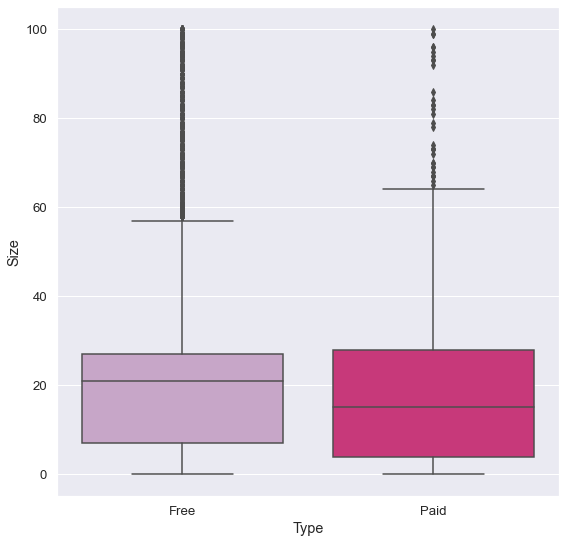

In [547]:
sns.boxplot(x='Type',y='Size',data=df,palette='PuRd')

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  - is there a correlation between rating, Reviews, Size with the price of the app </h1>

In [687]:
df.corr()['Price']
#  no correlation


Rating      0.030881
Reviews    -0.033435
Size       -0.021700
Installs   -0.041821
Price       1.000000
Name: Price, dtype: float64

<AxesSubplot:>

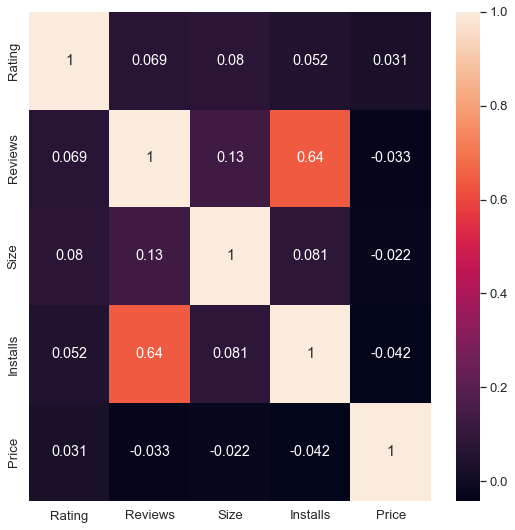

In [549]:
sns.heatmap(df.corr(),annot=True)

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  - How many apps for each type for each content reading. </h1>

In [697]:
x = pd.pivot_table(index='Type', columns='Content Rating', values='Rating', data=df, aggfunc='count')
x
#the maxiumn is free for everyone

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,6865.0,364.0,444.0,1038.0,1.0
Paid,NaN,490.0,31.0,14.0,39.0,NaN


<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  - How many apps that can work on android version 4 ? </h1>

In [686]:
df['working_on_version_4'].value_counts()
#there are 5815 working on version 4

True     5815
False    3474
Name: working_on_version_4, dtype: int64


<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  - which content rating has minimum rating ? </h1>

In [693]:
df.groupby('Content Rating').describe()['Rating']
#Everyone and Mature 17+ has minmum coontent rating

,count,mean,std,min,25%,50%,75%,max
Content Rating,,,,,,,,
Adults only 18+,3.0,4.300000,0.435890,3.8,4.15,4.5,4.55,4.6
Everyone,7355.0,4.186295,0.537624,1.0,4.00,4.3,4.50,5.0
Everyone 10+,395.0,4.255696,0.367578,1.8,4.10,4.3,4.50,5.0
Mature 17+,458.0,4.121616,0.505757,1.0,4.00,4.2,4.40,5.0
Teen,1077.0,4.232776,0.390302,2.0,4.00,4.3,4.50,5.0
Unrated,1.0,4.100000,NaN,4.1,4.10,4.1,4.10,4.1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,working_on_version_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.000000,10000,Free,0.0,Everyone,True
1,Coloring book moana,Art_And_Design,3.9,967.0,14.000000,500000,Free,0.0,Everyone,True
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.700000,5000000,Free,0.0,Everyone,True
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.000000,50000000,Free,0.0,Teen,True
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.800000,100000,Free,0.0,Everyone,True
...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,Family,4.0,7.0,2.600000,500,Free,0.0,Everyone,True
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.000000,5000,Free,0.0,Everyone,True
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.600000,100,Free,0.0,Everyone,True
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,22.957271,1000,Free,0.0,Mature 17+,False


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

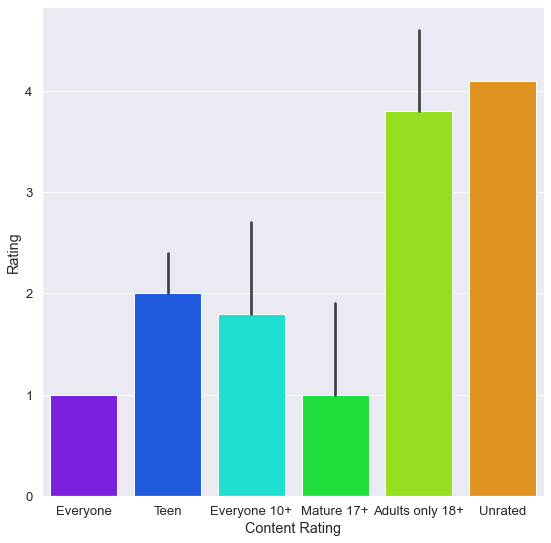

In [705]:
sns.barplot(x='Content Rating',y='Rating',estimator=np.min,data=df,palette='gist_rainbow_r')
#Everyone and Mature 17+ has minmum coontent rating

<h1 style="font-family:cursive; font-size:1.5em;color:brown;">  -does a higher number of installs give a clear picture of which app would have a better rating than others? </h1>


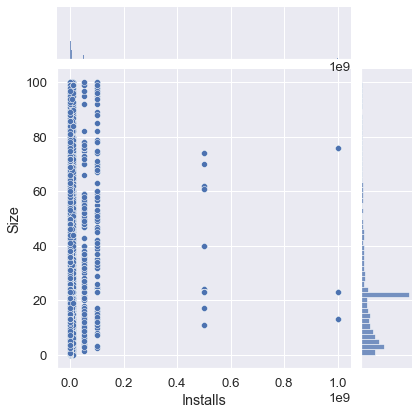

In [793]:
sns.jointplot(x='Installs',y='Size',data=df)
#no corrletion

In [792]:
df.corr()['Installs']
#no corrletion

Rating      0.051463
Reviews     0.641586
Size        0.081052
Installs    1.000000
Price      -0.030113
Name: Installs, dtype: float64

In [709]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df

<h1 style="font-family:Times New Roman; font-size:6m;color:BLUE;"><em> Bivariant  Analysis for Numerical values</em> </h1>

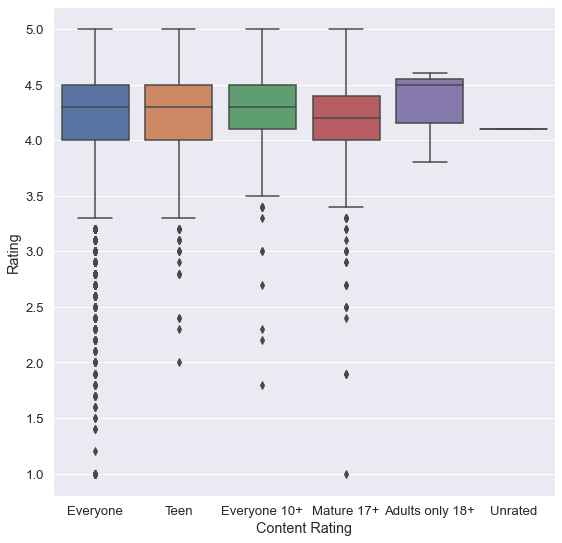

In [682]:
#Plot a box plot of Rating vs Content Rating
sns.boxplot(df['Content Rating'],df.Rating)
plt.show()
